In [1]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Carregando dataset

# Resumo: Do Serviço de Ciência Forense dos EUA;
#         foram coletados 6 tipos de vidro;
#         definidos em termos de seu teor de óxido (ou seja: Na, Fe, K, etc)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
newNames = ['ID Number','RI: Refractive Index','Na: Sodium','Mg: Magnesium','Al: Aluminium','Si: Silicon','K: Potassium','Ca: Calcium','Ba: Barium','Fe: Iron','Type of glass']
dataset = pd.read_csv(url, names=newNames, skiprows=0, delimiter=',')

y = dataset['Type of glass']
x = dataset.drop(['ID Number','Type of glass'], axis=1)

y = pd.get_dummies(y)
print(y)

     1  2  3  5  6  7
0    1  0  0  0  0  0
1    1  0  0  0  0  0
2    1  0  0  0  0  0
3    1  0  0  0  0  0
4    1  0  0  0  0  0
..  .. .. .. .. .. ..
209  0  0  0  0  0  1
210  0  0  0  0  0  1
211  0  0  0  0  0  1
212  0  0  0  0  0  1
213  0  0  0  0  0  1

[214 rows x 6 columns]


In [3]:
# Visualizando carregamento dataset

dataset.head()
y = dataset['Type of glass']
y = pd.get_dummies(y)

print(y)

     1  2  3  5  6  7
0    1  0  0  0  0  0
1    1  0  0  0  0  0
2    1  0  0  0  0  0
3    1  0  0  0  0  0
4    1  0  0  0  0  0
..  .. .. .. .. .. ..
209  0  0  0  0  0  1
210  0  0  0  0  0  1
211  0  0  0  0  0  1
212  0  0  0  0  0  1
213  0  0  0  0  0  1

[214 rows x 6 columns]


Text(0.5, 1.0, 'Relação entre os componentes do vidro')

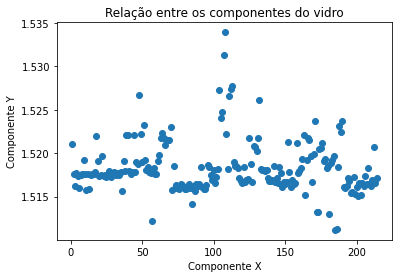

In [4]:
# Plotando relação entre as variáveis que desejamos.

# Nesse caso, estamos comparando alguns componentes do vidro, coletados na perícia forense.

#plt.scatter(dataset[["Na: Sodium"]], dataset[["Si: Silicon"]])
plt.scatter(dataset[["ID Number"]], dataset[["RI: Refractive Index"]])
plt.xlabel("Componente X")
plt.ylabel("Componente Y")
plt.title("Relação entre os componentes do vidro")

In [5]:
#######################################
#### Realizando testes pelo KMeans ####
#######################################

# Conjuntos do dataset via KMeans

from sklearn.cluster import KMeans

df = dataset.drop(['Type of glass'], axis=1)
print(dataset.describe())
dataset.head()
y = dataset['Type of glass']
kmeans = KMeans(n_clusters=9,
                random_state=0)
kmeans.fit(df)
kmeans.labels_

        ID Number  RI: Refractive Index  Na: Sodium  Mg: Magnesium  \
count  214.000000            214.000000  214.000000     214.000000   
mean   107.500000              1.518365   13.407850       2.684533   
std     61.920648              0.003037    0.816604       1.442408   
min      1.000000              1.511150   10.730000       0.000000   
25%     54.250000              1.516522   12.907500       2.115000   
50%    107.500000              1.517680   13.300000       3.480000   
75%    160.750000              1.519157   13.825000       3.600000   
max    214.000000              1.533930   17.380000       4.490000   

       Al: Aluminium  Si: Silicon  K: Potassium  Ca: Calcium  Ba: Barium  \
count     214.000000   214.000000    214.000000   214.000000  214.000000   
mean        1.444907    72.650935      0.497056     8.956963    0.175047   
std         0.499270     0.774546      0.652192     1.423153    0.497219   
min         0.290000    69.810000      0.000000     5.430000    0

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

     ID Number  RI: Refractive Index  Na: Sodium  Mg: Magnesium  \
0            1               1.52101       13.64           4.49   
1            2               1.51761       13.89           3.60   
2            3               1.51618       13.53           3.55   
3            4               1.51766       13.21           3.69   
4            5               1.51742       13.27           3.62   
..         ...                   ...         ...            ...   
209        210               1.51623       14.14           0.00   
210        211               1.51685       14.92           0.00   
211        212               1.52065       14.36           0.00   
212        213               1.51651       14.38           0.00   
213        214               1.51711       14.23           0.00   

     Al: Aluminium  Si: Silicon  K: Potassium  Ca: Calcium  Ba: Barium  \
0             1.10        71.78          0.06         8.75        0.00   
1             1.36        72.73          0.48  

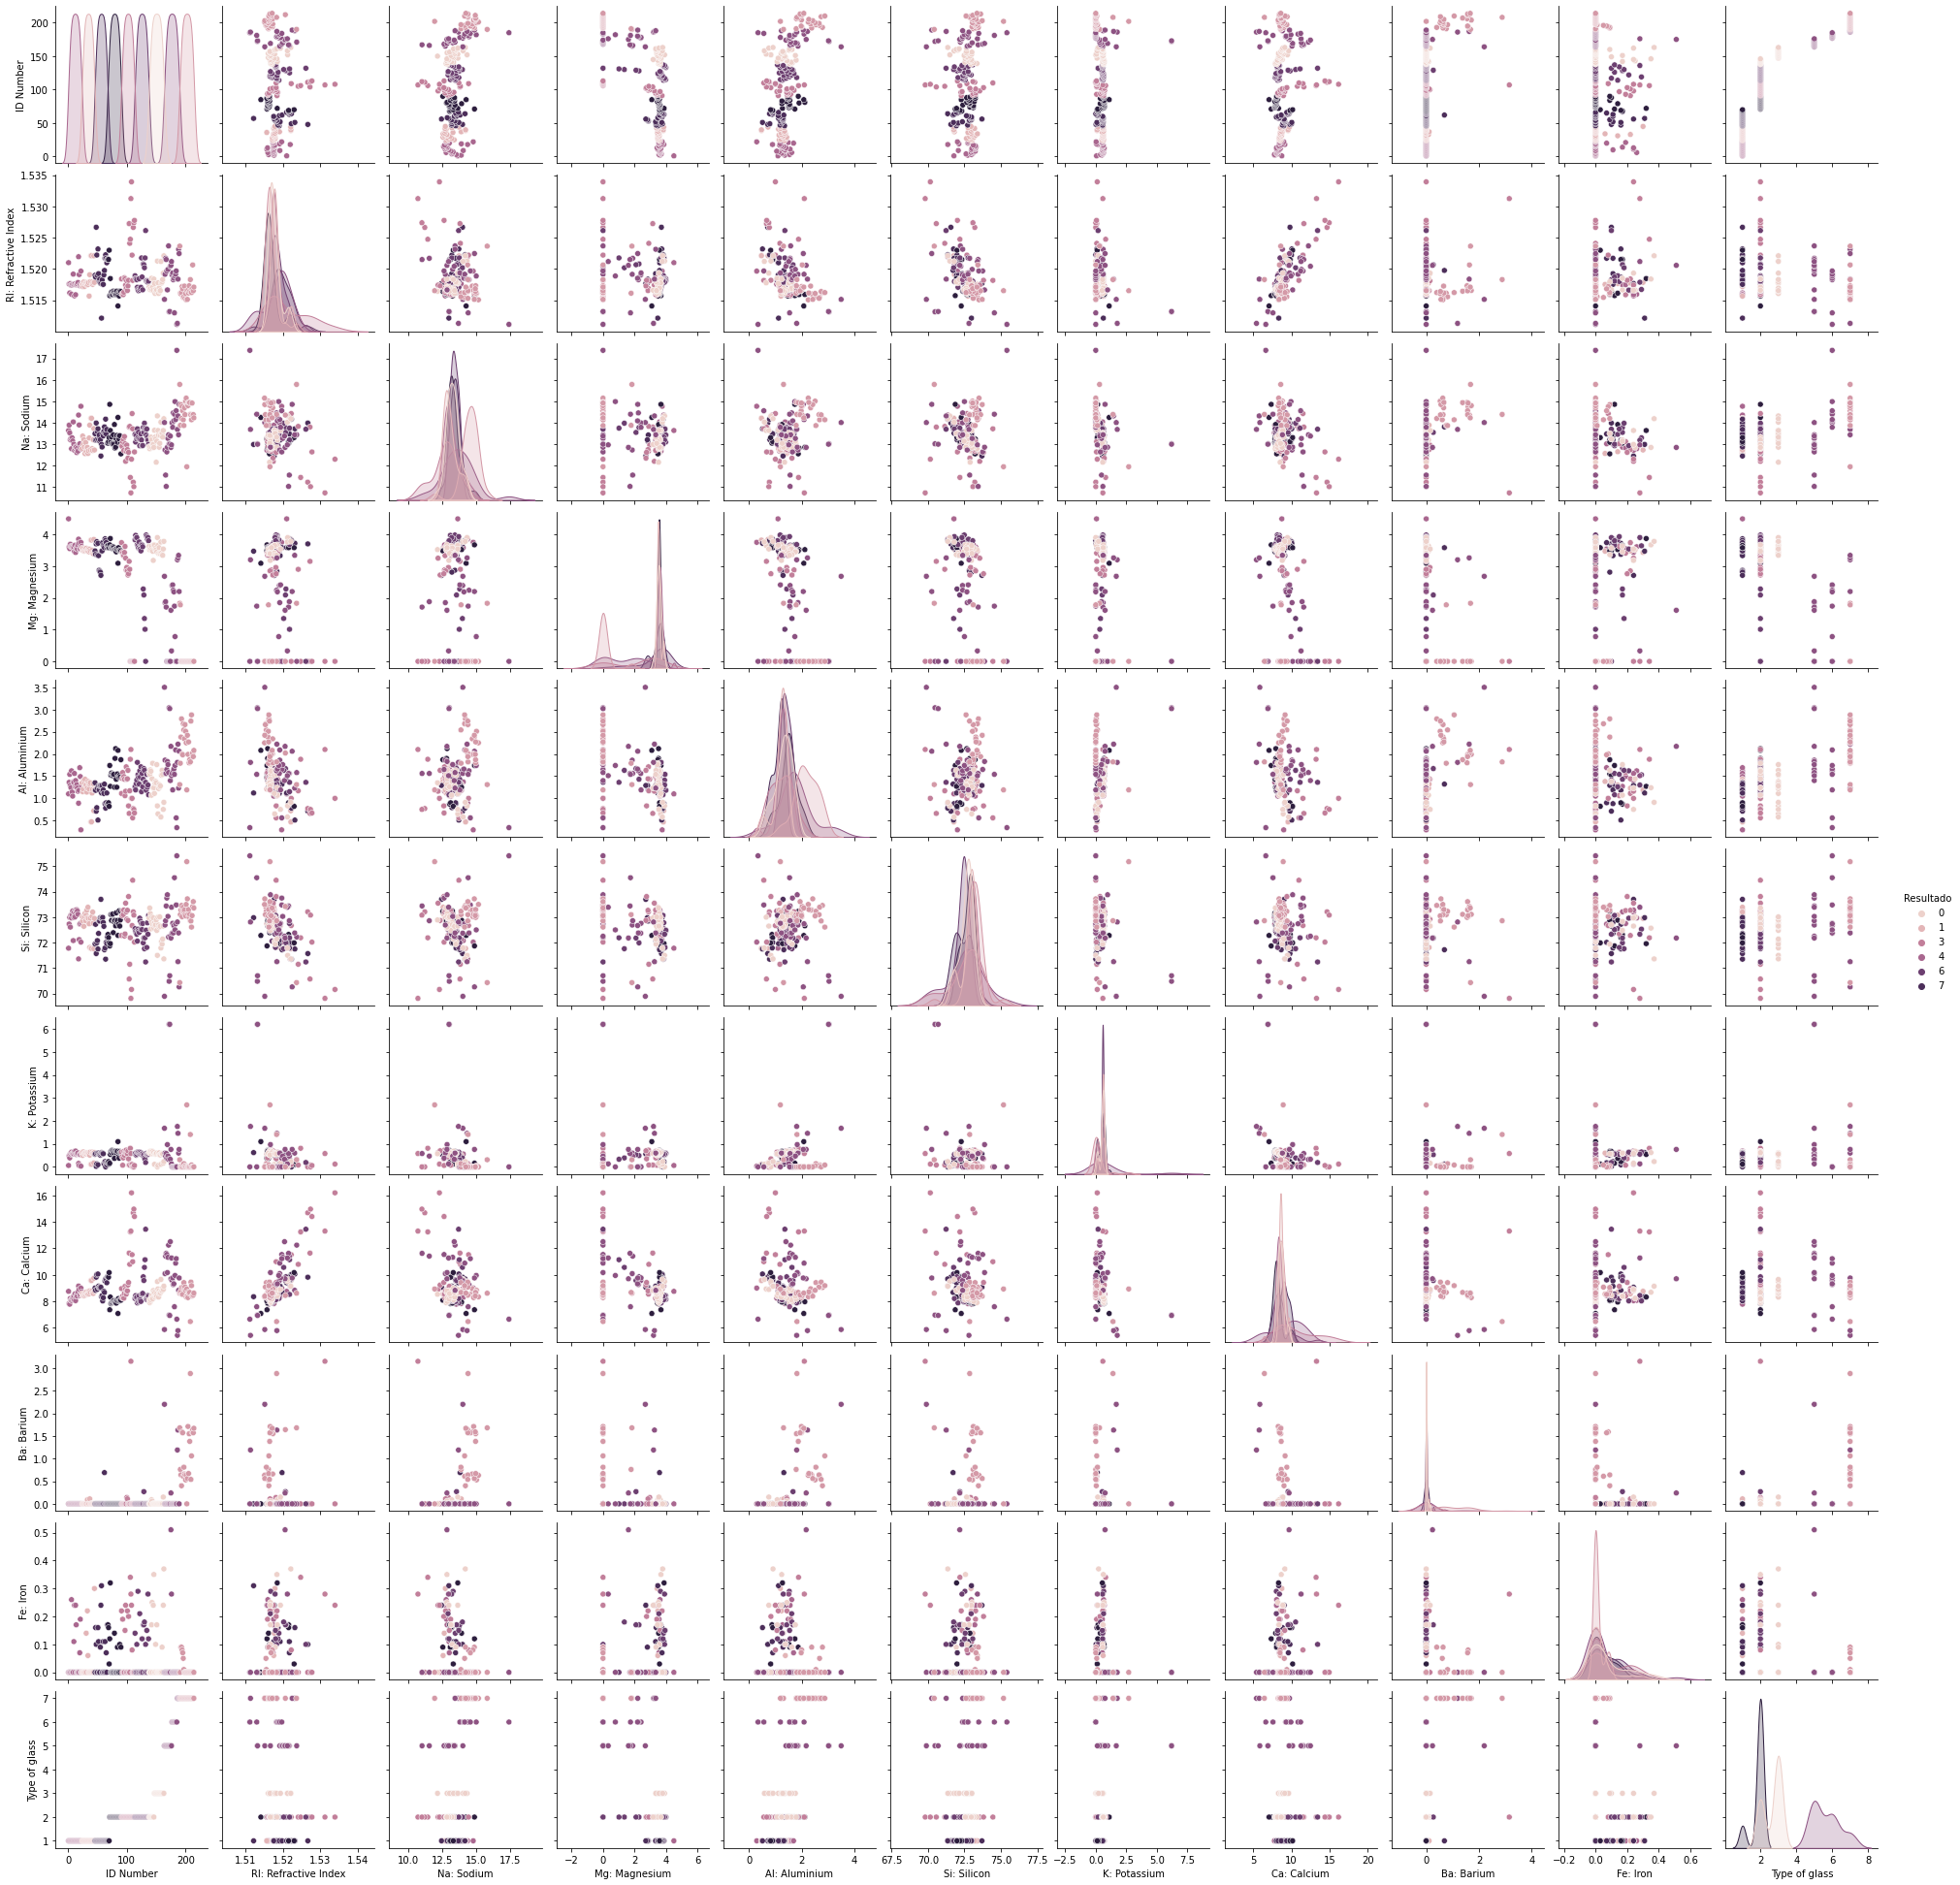

In [6]:
import seaborn as sb

dataset["Resultado"] = kmeans.labels_
print(dataset)
sb.pairplot(dataset, hue="Resultado")

# > Type of glass: (class attribute)
# - 1 building_windows_float_processed [janelas de construção flutuam processadas]
# - 2 building_windows_non_float_processed [construção de janelas não flutuantes processadas]
# - 3 vehicle_windows_float_processed [janelas do veículo flutuam processadas]
# - 4 vehicle_windows_non_float_processed (none in this database) [janelas do veículo processadas sem flutuação (nenhuma neste banco de dados)]
# - 5 containers [recipientes]
# - 6 tableware [talheres]
# - 7 headlamps [faróis]

In [7]:
# Lançando dados

# Dropando Type of glass
dados = dataset.drop("Type of glass", axis=1)

# Escalodando e Não Normalizando
escala = StandardScaler()
dadosEscalonados = escala.fit_transform(dados)

print(dadosEscalonados)

[[-1.72397593  0.87286765  0.28495326 ... -0.35287683 -0.5864509
   0.01992345]
 [-1.70778837 -0.24933347  0.59181718 ... -0.35287683 -0.5864509
   0.01992345]
 [-1.6916008  -0.72131806  0.14993314 ... -0.35287683 -0.5864509
   0.01992345]
 ...
 [ 1.6916008   0.75404635  1.16872135 ...  2.95320036 -0.5864509
  -0.75527988]
 [ 1.70778837 -0.61239854  1.19327046 ...  2.81208731 -0.5864509
  -0.75527988]
 [ 1.72397593 -0.41436305  1.00915211 ...  3.01367739 -0.5864509
  -0.75527988]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[2354.0000000000005,
 1869.5414870274692,
 1571.634007340474,
 1366.9431290995394,
 1203.0640449210618,
 1081.4946495170439,
 970.4693117509693,
 870.851724068434,
 816.1046703579317]

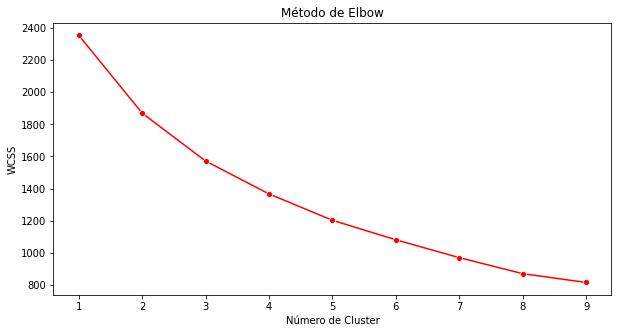

In [ ]:
# Elbow; plotando WCSS com o valor K (qtd de Cluster), com base no código elaborado em sala de aula (SEM PCA)

def elbow(dadosEscalonados):
  wcss = []
  for i in range(1,10):     #range(1,11)
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    random_state=5,
                    max_iter=300)
    kmeans.fit(dadosEscalonados)
    wcss.append(kmeans.inertia_)
  plt.figure(figsize=(10,5))
  sb.lineplot(range(1,10),    #range(1,11)
              wcss, marker="o",
              color='red')
  plt.title('Método de Elbow')
  plt.xlabel('Número de Cluster')
  plt.ylabel('WCSS')
  return wcss
elbow(dadosEscalonados)

In [ ]:
# Treinando modelo sem escalonamento

kmeans = KMeans(n_clusters=9,   #n_clusters=3
                init="k-means++",
                random_state=0)
kmeansA = kmeans.fit(dados)

agrupamento = kmeansA.labels_
agrupamento

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
# Inserindo coluna Grupo

dados['Grupo'] = agrupamento
dados
#dados.head(100)

,ID Number,RI: Refractive Index,Na: Sodium,Mg: Magnesium,Al: Aluminium,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Resultado,Grupo
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,4,4
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,4,4
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,4,4
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,4,4
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,2,2
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,2,2
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,2,2
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,2,2


[0.26027883 0.21205299]
0.4723318190732504


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[1111.8691020984318, 633.6236255041249, 349.85476392480354, 254.91872624506183, 196.75736194976253, 150.99450163013378, 124.54683678212288, 109.32491553729761, 95.7920006800941]


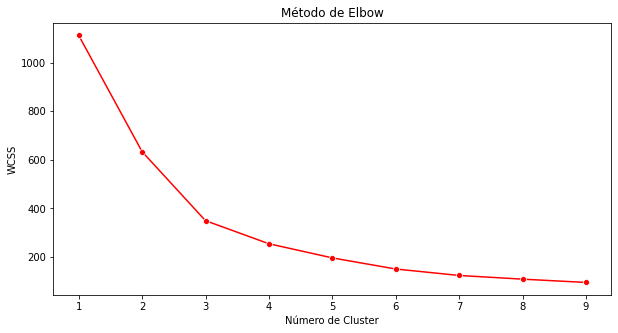

In [ ]:
# Plotando Gráfico com PCA, com base no código elaborado em sala de aula
# A curva parece um cotovelo. No gráfico, o cotovelo está em k=3 (ou seja, a soma das distâncias quadradas cai repentinamente), indicando que o k ideal para este conjunto de dados é 3.

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
dados_pca = pca.fit_transform(dadosEscalonados)

# Variáveis explicativas
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

# Elbow
print(elbow(dados_pca))
kmeans = KMeans(n_clusters=9,       #n_clusters=3
                init="k-means++",
                random_state=0)
kmeans2 = kmeans.fit(dados_pca)
centroides = kmeans2.cluster_centers_
agrupamento = kmeans2.labels_
agrupamento

# Plotar o Grafico
import plotly.express as px
import plotly.graph_objects as go

graf1 = px.scatter(x=dados_pca[:,0], y=dados_pca[:,1], color=agrupamento)
graf2 = px.scatter(x=centroides[:,0], y=centroides[:,1], size = [15,15,15,15,15,15,15,15,15])     #size = [15,15,15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=620,height=480,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente X')
graf3.update_yaxes(title = 'Componente Y')
graf3.show()